* Dates:
    * Older moves might not be torrented
    * Month: Blockbusters are released in May and December, No good movies released January - April, Kids are on summer cvaction during summer months.
* Production Budget: 
    * Might be outliers. Take log if outliers, Remove outliers, Create new feature that is binning production budget
* Rating: Is there a relationship with Number of torrents, look at mean, median torrents per rating. Maybe group ratings together for example G, PG, PG-13 in one group R in another
* Genre as a feature. Maybe keep a subset maybe create new ratings by combing other ratings

In [1]:
import pandas as pd
import numpy as np
import string
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

# Read in TRAIN data set and select pertinent columns

In [2]:
df = pd.read_csv('data/train_data2.csv', encoding='latin-1')
print(len(df))
df.head()

1324


,Title,Prod_Budget,Released,Year,Month,Rated,Runtime,Genre,Director,Actors,Total_Torrents
0,The Game,50000000,1997-09-12,1997.0,9.0,R,129,"Drama, Mystery, Thriller",David Fincher,"Michael Douglas, Sean Penn, Deborah Kara Unger...",276.0
1,Speed,30000000,1994-06-10,1994.0,6.0,R,116,"Action, Adventure, Crime",Jan de Bont,"Keanu Reeves, Dennis Hopper, Sandra Bullock, J...",241.0
2,The Man in the Iron Mask,35000000,1998-03-13,1998.0,3.0,PG-13,132,"Action, Adventure",Randall Wallace,"Leonardo DiCaprio, Jeremy Irons, John Malkovic...",95.0
3,Hide & Seek,25000000,2005-01-28,2005.0,1.0,R,101,"Drama, Horror, Thriller",John Polson,"Robert De Niro, Dakota Fanning, Famke Janssen,...",89.0
4,The Three Stooges,30000000,2012-04-13,2012.0,4.0,PG,92,Comedy,"Bobby Farrelly, Peter Farrelly","Sean Hayes, Will Sasso, Chris Diamantopoulos, ...",230.0


# Convert dates to datetime objects

In [3]:
df['Released'] = pd.to_datetime(df['Released'])
df['Year'] = pd.DatetimeIndex(df['Released']).year
df['Month'] = pd.DatetimeIndex(df['Released']).month
df.head()

,Title,Prod_Budget,Released,Year,Month,Rated,Runtime,Genre,Director,Actors,Total_Torrents
0,The Game,50000000,1997-09-12,1997,9,R,129,"Drama, Mystery, Thriller",David Fincher,"Michael Douglas, Sean Penn, Deborah Kara Unger...",276.0
1,Speed,30000000,1994-06-10,1994,6,R,116,"Action, Adventure, Crime",Jan de Bont,"Keanu Reeves, Dennis Hopper, Sandra Bullock, J...",241.0
2,The Man in the Iron Mask,35000000,1998-03-13,1998,3,PG-13,132,"Action, Adventure",Randall Wallace,"Leonardo DiCaprio, Jeremy Irons, John Malkovic...",95.0
3,Hide & Seek,25000000,2005-01-28,2005,1,R,101,"Drama, Horror, Thriller",John Polson,"Robert De Niro, Dakota Fanning, Famke Janssen,...",89.0
4,The Three Stooges,30000000,2012-04-13,2012,4,PG,92,Comedy,"Bobby Farrelly, Peter Farrelly","Sean Hayes, Will Sasso, Chris Diamantopoulos, ...",230.0


# Inspect years

In [4]:
df['Year'].describe().astype(int)

count    1324
mean     2003
std         9
min      1966
25%      1999
50%      2005
75%      2010
max      2016
Name: Year, dtype: int64

In [5]:
# dictionary - year counts
yr_dict = df['Year'].value_counts().to_dict()

import operator
yr_lst = sorted(yr_dict.items(), key=operator.itemgetter(0)) # sort by year
yr_lst = yr_lst[::-1]
#print(yr_lst)

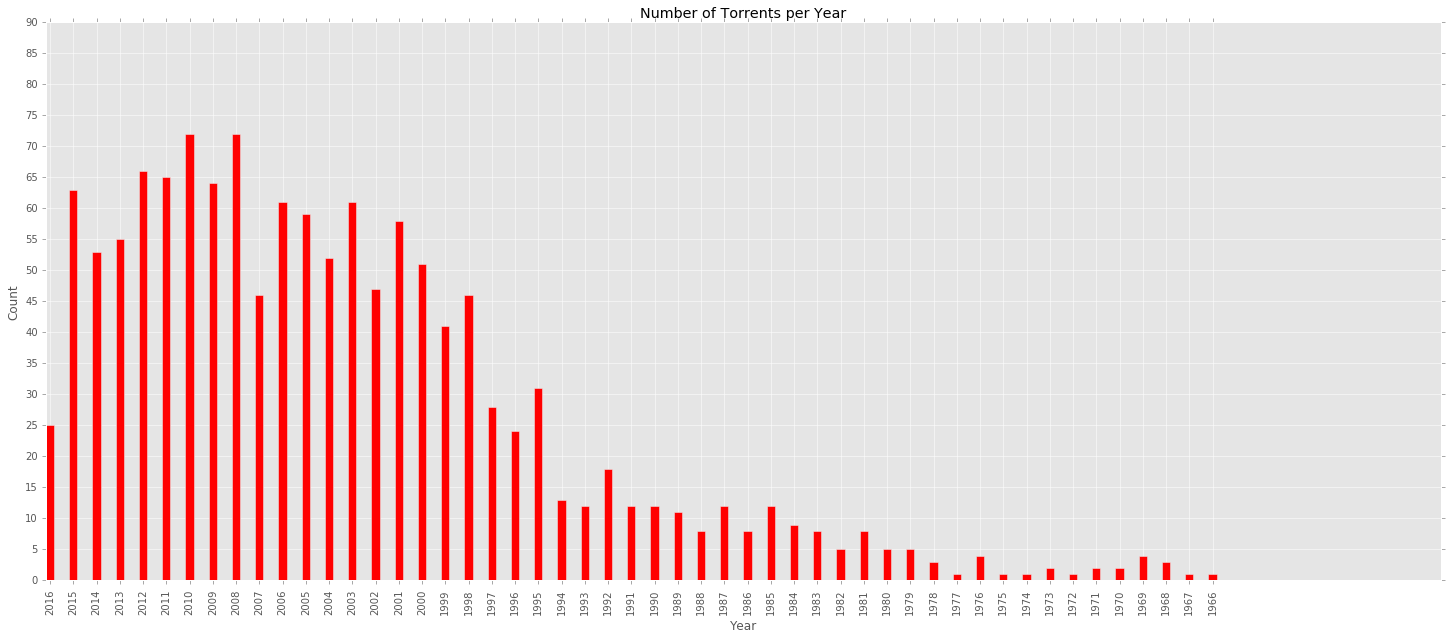

In [6]:
plt.figure(figsize=(25,10))

ind = np.arange(len(yr_dict))
width = 0.35

bar_year = [year for year, count in yr_lst]
bar_count = [count for year, count in yr_lst]

plt.bar(ind, bar_count, width, color='r')

plt.ylabel('Count')
plt.xlabel('Year')
plt.title('Number of Torrents per Year')
plt.xticks(ind + width/2., (bar_year), rotation='vertical')
plt.yticks(np.arange(0, 91, 5))

plt.show()

# df => df_yr 

In [7]:
# cut off at year 
before = len(df)
yr_cut_bot = 1998
yr_cut_top = 2015
mask = (df['Year'] >= yr_cut_bot) & (df['Year'] < yr_cut_top)
df_yr = df.loc[mask]
df_yr.sort_values('Year').head()
after = len(df_yr)

print('{0} entries lost ({1}%) due to date cutoff between {2} and {3}'.format(before-after, 
                                                round((before/after)/before *100, 2), yr_cut_bot, yr_cut_top))

355 entries lost (0.1%) due to date cutoff between 1998 and 2015


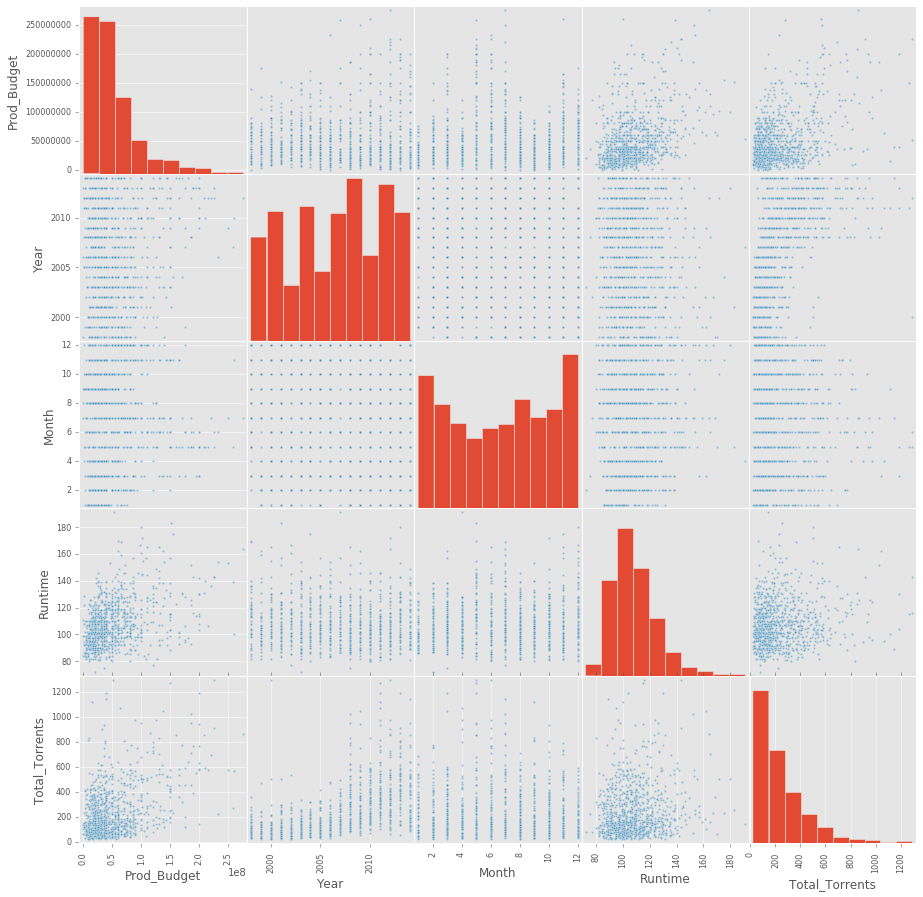

In [8]:
# look at current data set AFTER year cutoff
plt.rcParams['figure.figsize'] = (15, 15)
_ = pd.tools.plotting.scatter_matrix(df_yr)

In [9]:
# unique list of grouped genres as strings
unq_genres = df_yr['Genre'].unique()
unq_genres = unq_genres.tolist()

#print(len(unq_genres))
#print(unq_genres[:10])

# unique list of grouped genres as lists
lst_grp_genres = []
for lst in unq_genres:
    temp = []
    for genre in lst.split(','):
         temp.append(genre)
    lst_grp_genres.append(temp)

#print(len(lst_grp_genres))
#print(lst_grp_genres)

In [10]:
# unique list of individual genres
ind_genre = set()

for lst in unq_genres:
    for genre in lst.split(','):
        ind_genre.add(genre.strip())
ind_genre = sorted(ind_genre)

#print(len(ind_genre))
#print(ind_genre)

In [11]:
# dictionary - count of genre occurences
count = defaultdict(lambda:0)

for genre in ind_genre:
    count[genre] = df_yr.Genre.str.contains(genre).sum()

import operator
srt = sorted(count.items(), key=operator.itemgetter(1))
srt = srt[::-1]
#print(srt)

In [12]:
def split_to_array(ser):
    split_array = np.array(ser.strip().replace(',','').split(' '))
    return pd.Series(split_array)

genres = df_yr.Genre.apply(split_to_array)
genres = pd.Series(genres.values.ravel()).dropna()
genres = genres.value_counts().sort_values(ascending=False)

In [13]:
def convert_frequency(ser, genres=genres):
    split_array = np.array(ser.strip().replace(',','').split(' '))
    genre = genres.loc[split_array].argmax()
    return genre

df_yr['Genre_Single'] = df_yr.Genre.apply(convert_frequency)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# Select only significant values from dataframe
# df_yr => df_sub

In [14]:
# select only genres of significance
genre = ['Action', 'Adventure', 'Comedy', 'Drama']
df_sub = df_yr.loc[df_yr['Genre_Single'].isin(genre)]

# select only genres of significance
ratings = ['PG-13', 'PG', 'G', 'R']
df_sub = df_sub.loc[df_sub['Rated'].isin(ratings)]

#df_sub['Runtime'].value_counts()
#df_sub['Genre_Single'].value_counts()
#df_sub['Rated'].value_counts()
df_sub.describe()

,Prod_Budget,Year,Month,Runtime,Total_Torrents
count,8.700000e+02,870.000000,870.000000,870.000000,870.000000
mean,5.498349e+07,2006.388506,6.682759,109.205747,243.986207
std,4.510347e+07,4.776318,3.295993,17.343221,213.147765
min,6.800000e+04,1998.000000,1.000000,72.000000,20.000000
25%,2.500000e+07,2002.000000,4.000000,97.000000,95.250000
50%,4.000000e+07,2007.000000,7.000000,106.000000,170.000000
75%,7.000000e+07,2010.000000,9.000000,118.000000,327.000000
max,2.750000e+08,2014.000000,12.000000,191.000000,1294.000000


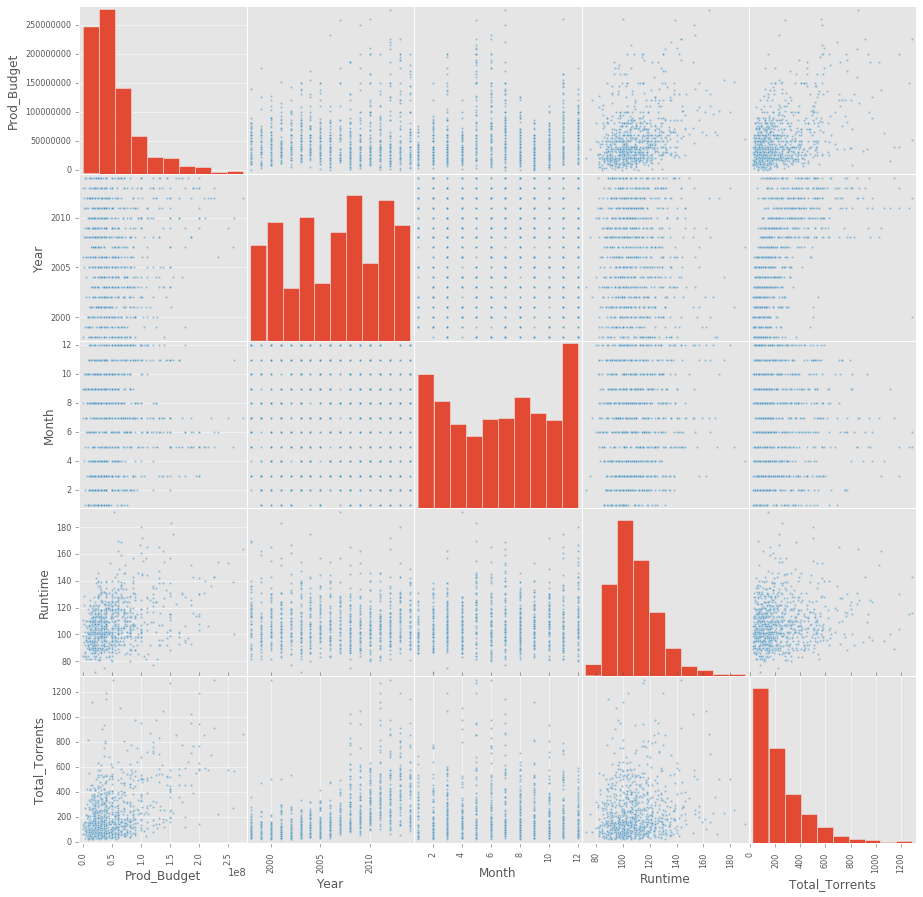

In [15]:
# entire dataframe
plt.rcParams['figure.figsize'] = (15, 15)
_ = pd.tools.plotting.scatter_matrix(df_sub)

In [16]:
from patsy import dmatrices
patsy_formula = 'Total_Torrents ~ Prod_Budget + Year + Genre_Single'
y, x = dmatrices(patsy_formula, data=df_sub, return_type='dataframe')

In [17]:
import statsmodels.api as sm
model = sm.OLS(y, x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Total_Torrents   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     173.1
Date:                Fri, 15 Jul 2016   Prob (F-statistic):          1.50e-127
Time:                        11:19:52   Log-Likelihood:                -5597.0
No. Observations:                 870   AIC:                         1.121e+04
Df Residuals:                     864   BIC:                         1.123e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Intercept                 -4.488e+04   2169.846    -20.683      0.000     -4.91e+04 -4.06e+04
Genre_Single[T.Adventure]  -124.9517     35.439     -3.526      0.000      -194.508   -55.395
Genre_Single[T.Comedy]     -107.2875     15.475     -6.933      0.000      -137.661   -76.914
Genre_Single[T.Drama]      -104.5923     14.988     -6.979      0.000      -134.009   -75.176
Prod_Budget                1.621e-06   1.25e-07     12.996      0.000      1.38e-06  1.87e-06
Year                         22.4887      1.082     20.793      0.000        20.366    24.612
==============================================================================
Omnibus:                      428.597   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3822.508
Skew:                           2.046   Prob(JB):                         0.00
Kurtosis:                      12.418   Cond. No.                     3.01e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.01e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)
mod_lr_score = model.score(x, y)
mod_lr_coef = model.coef_

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [19]:
from sklearn import cross_validation as cv
from sklearn import metrics

x_train, x_test, y_train, y_test = cv.train_test_split(x,y,test_size=0.20,random_state=1234)

model = LinearRegression().fit(x_train, y_train)

# store results
mean_sq_err = metrics.mean_squared_error(y_train,model.predict(x_train))
cv_mod_score = model.score(x_train, y_train)

In [20]:
# reset x, y otherwise errors occur
y, x = dmatrices(patsy_formula, data=df_sub, return_type='dataframe')

from sklearn.cross_validation import KFold
kf = KFold(len(df_sub), n_folds=10, shuffle=True)

for train_index, test_index in kf:
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf2 = LinearRegression().fit(x.iloc[train_index], y.iloc[train_index])

# store results
mean_sq_errKf = metrics.mean_squared_error(y_train,model.predict(x_train))
cvKf_mod_score = clf2.score(x,y)

In [21]:
#NORMAL RESULTS
print('Model Linear Regression Score = {0}'.format(mod_lr_score))
print('            Mean Square Error = {0}'.format(mean_sq_err))
print(' Cross Validation Model Score = {0}'.format(cv_mod_score))
print('     Mean Squred Error K-Fold = {0}'.format(mean_sq_errKf))
print('Cross Val. K-Fold Model Score = {0}'.format(cvKf_mod_score))

Model Linear Regression Score = 0.5004260833732764
            Mean Square Error = 24380.77379021134
 Cross Validation Model Score = 0.5029329762383491
     Mean Squred Error K-Fold = 22874.276353438432
Cross Val. K-Fold Model Score = 0.49994857620789507


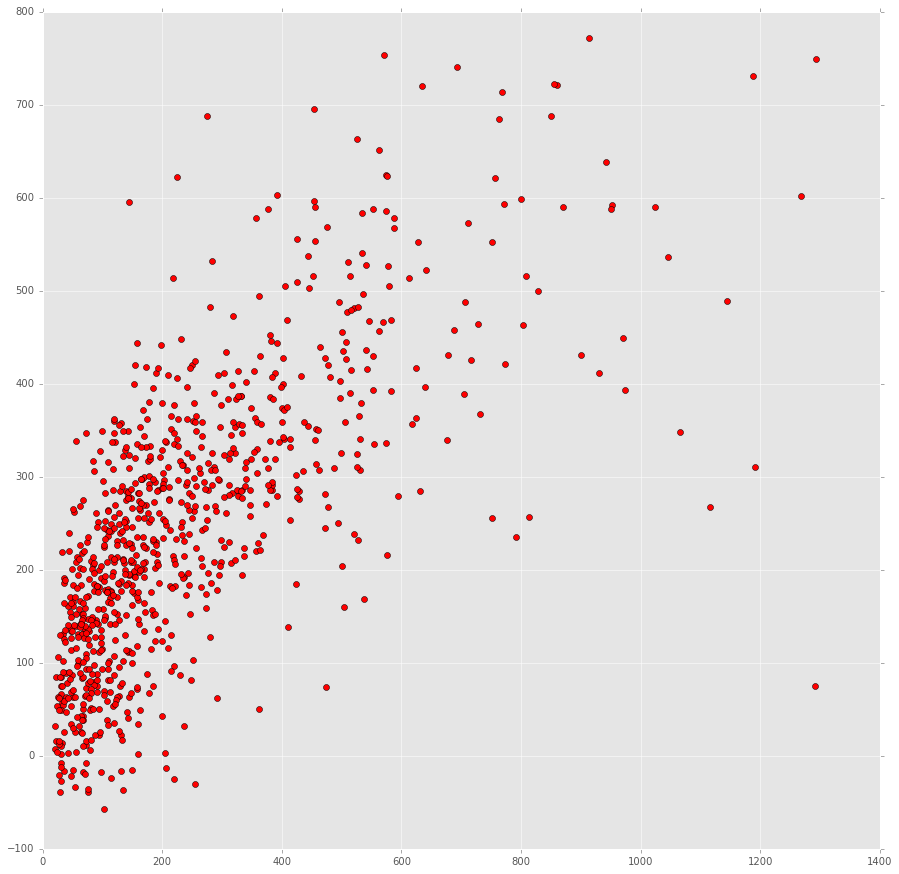

In [22]:
_ = plt.plot(y, model.predict(x), 'ro')

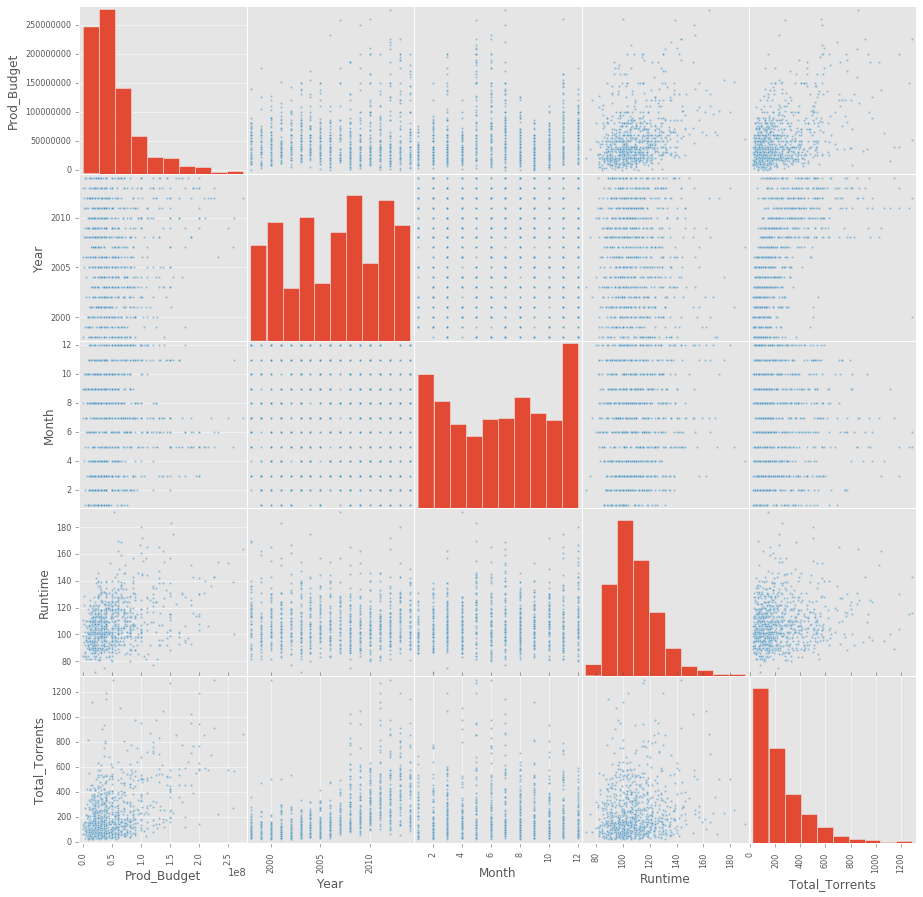

In [23]:
# entire dataframe
plt.rcParams['figure.figsize'] = (15, 15)
_ = pd.tools.plotting.scatter_matrix(df_sub)

---
# Log Transform

In [24]:
df.columns

Index(['Title', 'Prod_Budget', 'Released', 'Year', 'Month', 'Rated', 'Runtime',
       'Genre', 'Director', 'Actors', 'Total_Torrents'],
      dtype='object')

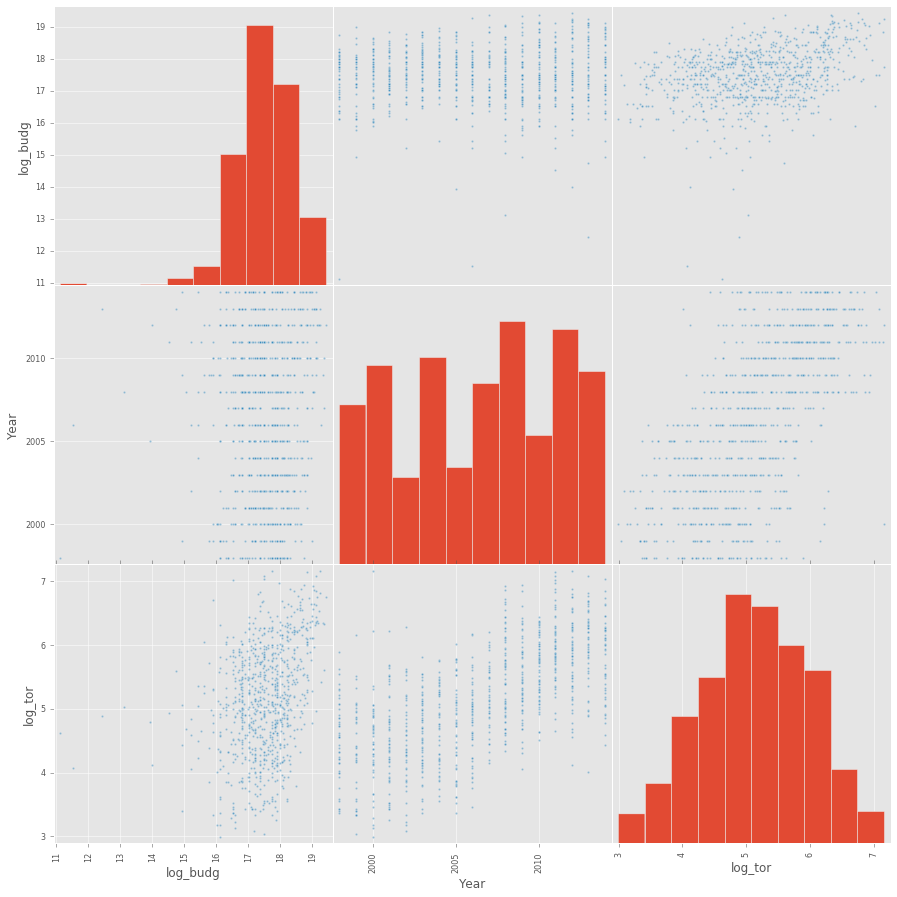

In [25]:
df_sub['log_budg']=np.log(df_sub.Prod_Budget)
#df_sub['log_year']=np.log(df_sub.Year)
#df_sub['log_run']=np.log(df_sub.Runtime)
df_sub['log_tor']=np.log(df_sub.Total_Torrents)

trans = df_sub[['log_budg', 'Year', 'log_tor']]
plt.rcParams['figure.figsize'] = (15, 15)
_ = pd.tools.plotting.scatter_matrix(trans)

In [26]:
log_patsy_formula = 'log_tor ~ log_budg + Year + Genre_Single'
y, x = dmatrices(log_patsy_formula, data=df_sub, return_type='dataframe')

In [27]:
import statsmodels.formula.api as smf
results = smf.ols(formula=log_patsy_formula, data=df_sub,).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_tor   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     210.6
Date:                Fri, 15 Jul 2016   Prob (F-statistic):          8.12e-147
Time:                        11:19:56   Log-Likelihood:                -751.82
No. Observations:                 870   AIC:                             1516.
Df Residuals:                     864   BIC:                             1544.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Intercept                  -222.5690      8.248    -26.984      0.000      -238.758  -206.380
Genre_Single[T.Adventure]    -0.3057      0.134     -2.277      0.023        -0.569    -0.042
Genre_Single[T.Comedy]       -0.4643      0.058     -7.950      0.000        -0.579    -0.350
Genre_Single[T.Drama]        -0.4195      0.056     -7.434      0.000        -0.530    -0.309
log_budg                      0.2463      0.023     10.796      0.000         0.201     0.291
Year                          0.1115      0.004     27.174      0.000         0.103     0.120
==============================================================================
Omnibus:                       14.752   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.700
Skew:                           0.169   Prob(JB):                     3.20e-05
Kurtosis:                       3.676   Cond. No.                     8.47e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.47e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)

# store results
log_mod_lr_score = model.score(x,y)

In [29]:
from sklearn import cross_validation as cv
from sklearn import metrics

x_train, x_test, y_train, y_test = cv.train_test_split(x,y,test_size=0.20,random_state=1234)

model = LinearRegression().fit(x_train, y_train)

# store results
log_mean_sq_err = metrics.mean_squared_error(y_train,model.predict(x_train))
log_cv_mod_score = model.score(x_train, y_train)

In [30]:
# reset x, y otherwise errors occur
y, x = dmatrices(log_patsy_formula, data=df_sub, return_type='dataframe')

from sklearn.cross_validation import KFold
kf = KFold(len(df_sub), n_folds=10, shuffle=True)

for train_index, test_index in kf:
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf2 = LinearRegression().fit(x.iloc[train_index], y.iloc[train_index])

# store results
log_mean_sq_errKf = metrics.mean_squared_error(y_train,model.predict(x_train))
log_cvKf_mod_score = clf2.score(x,y)

In [31]:
#LOG RESULTS
print('Log Model Linear Regression Score = {0}'.format(log_mod_lr_score))
print('            Log Mean Square Error = {0}'.format(log_mean_sq_err))
print(' Log Cross Validation Model Score = {0}'.format(log_cv_mod_score))
print('     Log Mean Squred Error K-Fold = {0}'.format(log_mean_sq_errKf))
print('Log Cross Val. K-Fold Model Score = {0}'.format(log_cvKf_mod_score))

Log Model Linear Regression Score = 0.5493299479576038
            Log Mean Square Error = 0.32388596326721336
 Log Cross Validation Model Score = 0.5622872614092422
     Log Mean Squred Error K-Fold = 0.32376752981331525
Log Cross Val. K-Fold Model Score = 0.5489945841279755


In [32]:
df_TEST = pd.read_csv('data/test_data2.csv', encoding='latin-1')

df_TEST['log_budg']=np.log(df_TEST.Prod_Budget)
df_TEST['log_run']=np.log(df_TEST.Runtime)
df_TEST['log_tor']=np.log(df_TEST.Total_Torrents)

def split_to_array(ser):
    split_array = np.array(ser.strip().replace(',','').split(' '))
    return pd.Series(split_array)

genres = df_yr.Genre.apply(split_to_array)
genres = pd.Series(genres.values.ravel()).dropna()
genres = genres.value_counts().sort_values(ascending=False)

def convert_frequency(ser, genres=genres):
    split_array = np.array(ser.strip().replace(',','').split(' '))
    genre = genres.loc[split_array].argmax()
    return genre

df_TEST['Genre_Single'] = df_TEST.Genre.apply(convert_frequency)

log_patsy_formula_test = 'log_tor ~ log_budg + Year + Month + Genre_Single'
y, x = dmatrices(log_patsy_formula_test, data=df_TEST, return_type='dataframe')

print(clf2.score(x_test, y_test))
print(metrics.mean_squared_error(y_test,model.predict(x_test)))

0.502411383862
0.385917429195


In [33]:
#_ = plt.plot(y, model.predict(x), 'ro')